In [41]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
import cmasher as cmr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBRFRegressor

In [2]:
df=pd.read_csv('../data/input_data.csv').drop('Unnamed: 0',axis=1)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
cols=pd.get_dummies( df['ocean_proximity']).columns
df[cols]=pd.get_dummies( df['ocean_proximity'])
df=df.drop('ocean_proximity', axis=1)

In [10]:
X=df.drop('median_house_value', axis=1)
y=df['median_house_value']

In [11]:
from numpy import isnan
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(X)
Xtrans = imputer.transform(X)

In [12]:
df_new=pd.DataFrame(Xtrans, columns=X.columns)

In [13]:
df_new['median_house_value']=df['median_house_value']

In [14]:
df_new.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

In [15]:
df_new.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.836037,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.955600,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.750000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df_new.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0,352100.0


In [18]:
df_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

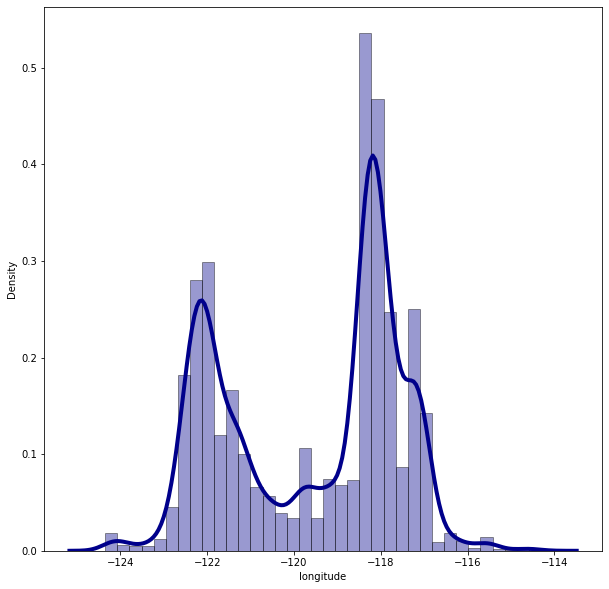

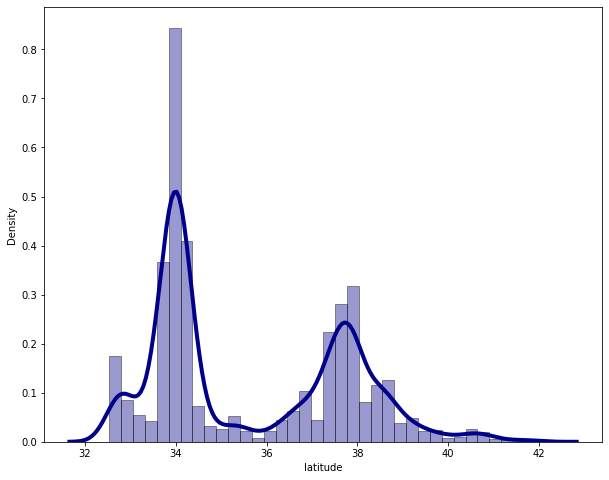

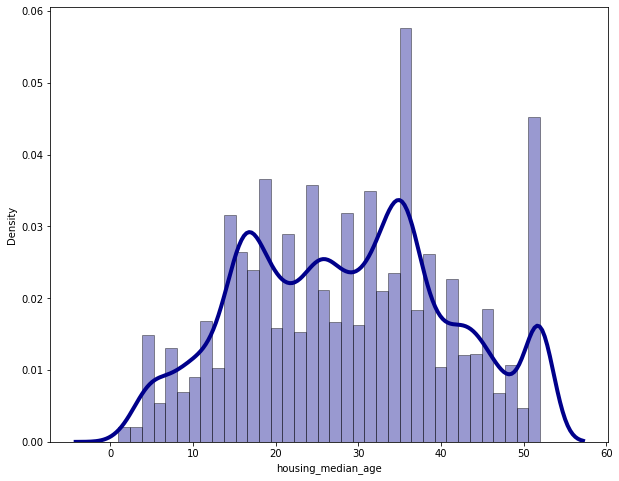

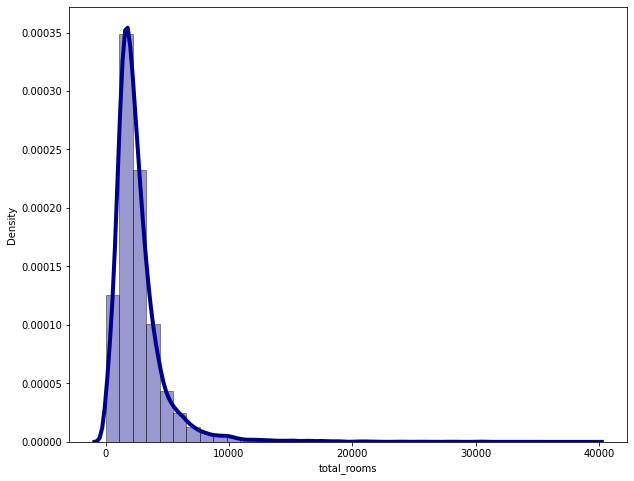

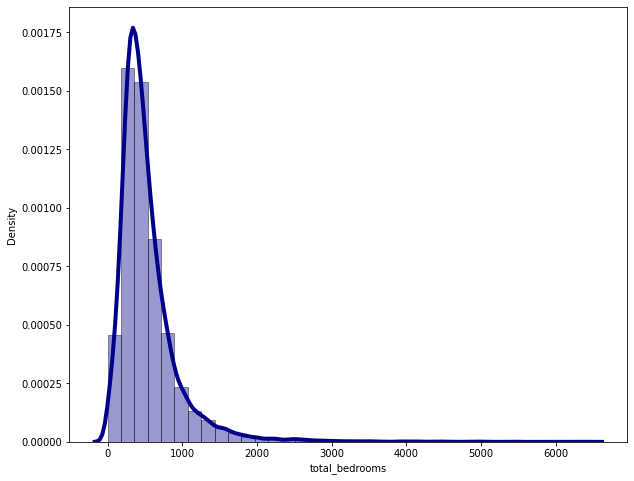

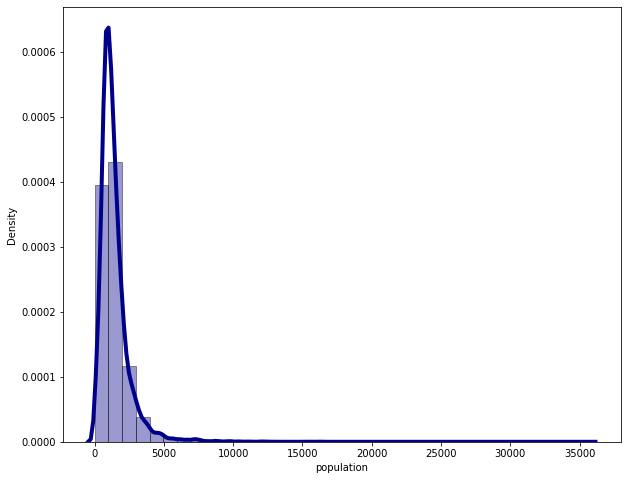

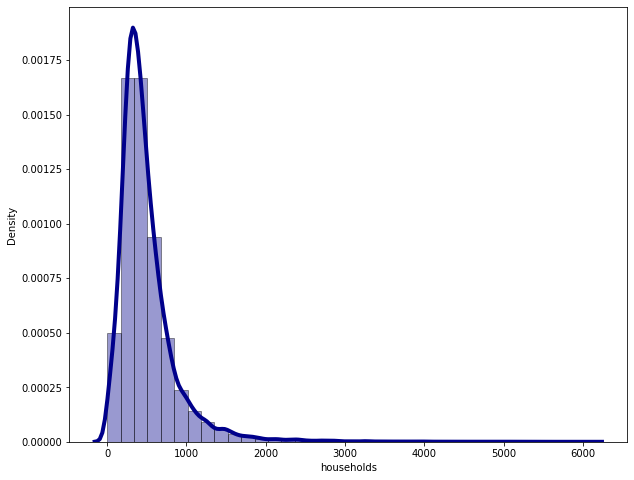

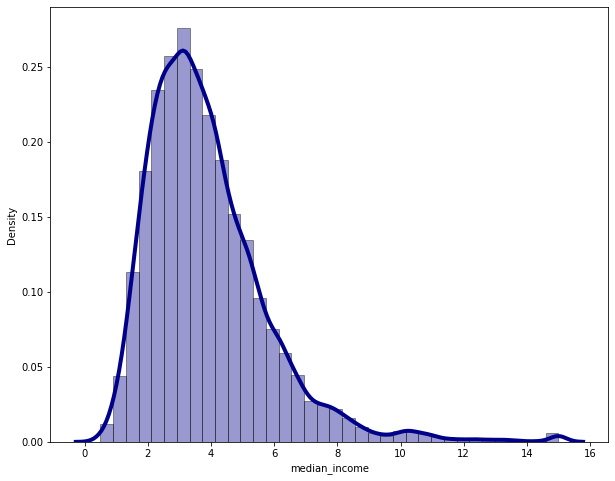

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']:
    sns.distplot(df_new[i], hist=True, kde=True,
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    plt.show()

<AxesSubplot:>

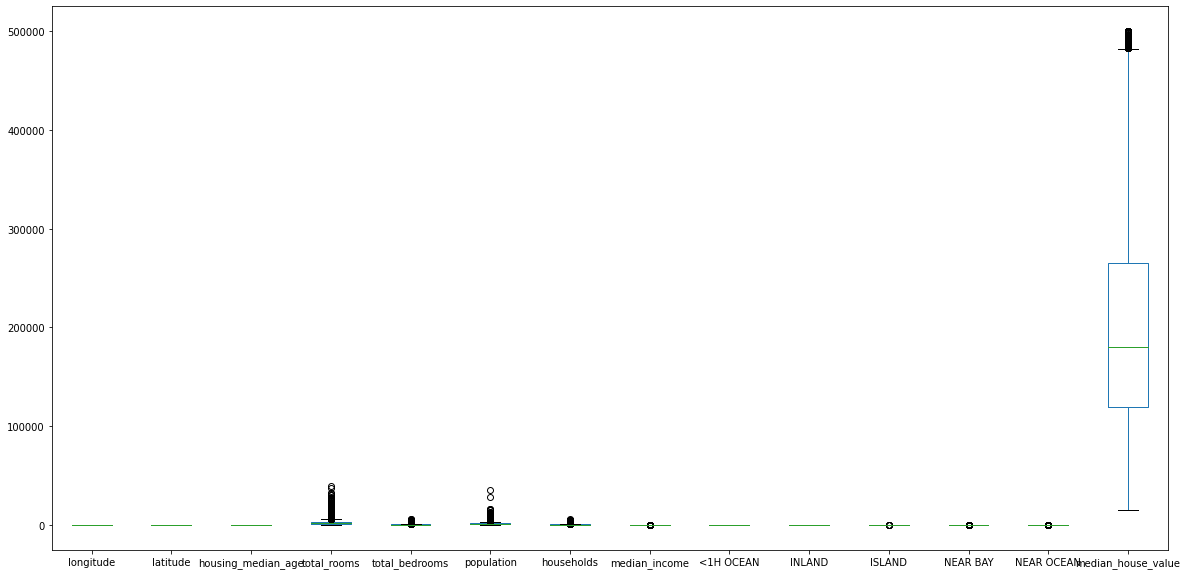

In [20]:
df_new.plot(kind='box', figsize=(20,10), )

In [21]:
new_df=df_new

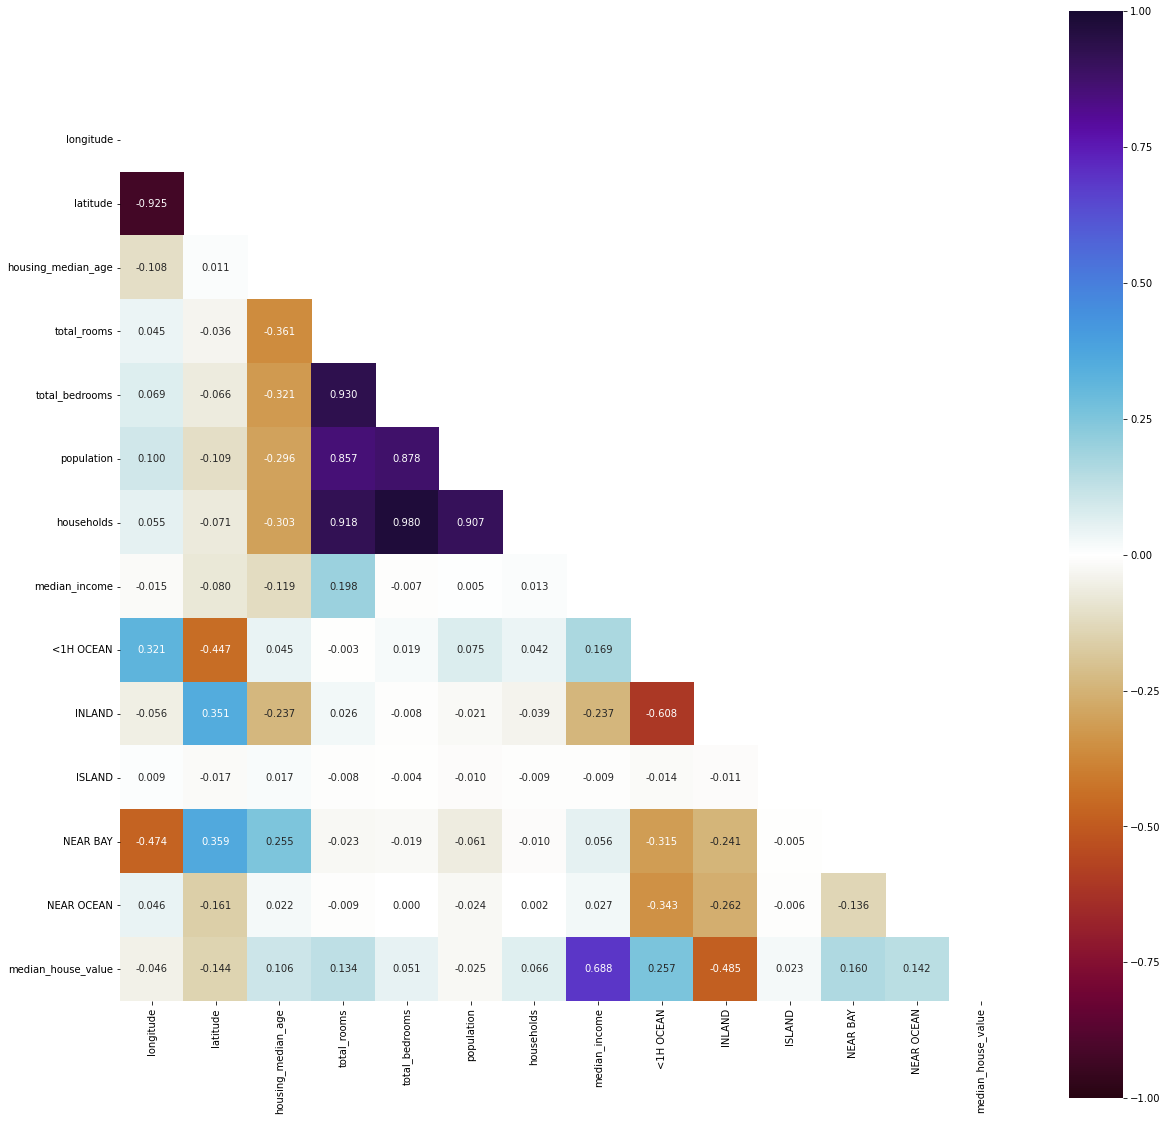

In [22]:
cmap = cmr.fusion                   # CMasher: The more dark ones are more co-related ones.
#cmap = plt.get_cmap('cmr.waterlily')

matrix=new_df.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

plt.figure(figsize=(20,20))

sns.heatmap(matrix, mask=mask,vmin=-1, vmax=1 , annot=True,
fmt='.3f', square=True, cmap = cmap)

plt.show();

In [23]:
new_df=df.drop(['households', 'total_bedrooms', 'latitude', 'population'],axis=1)

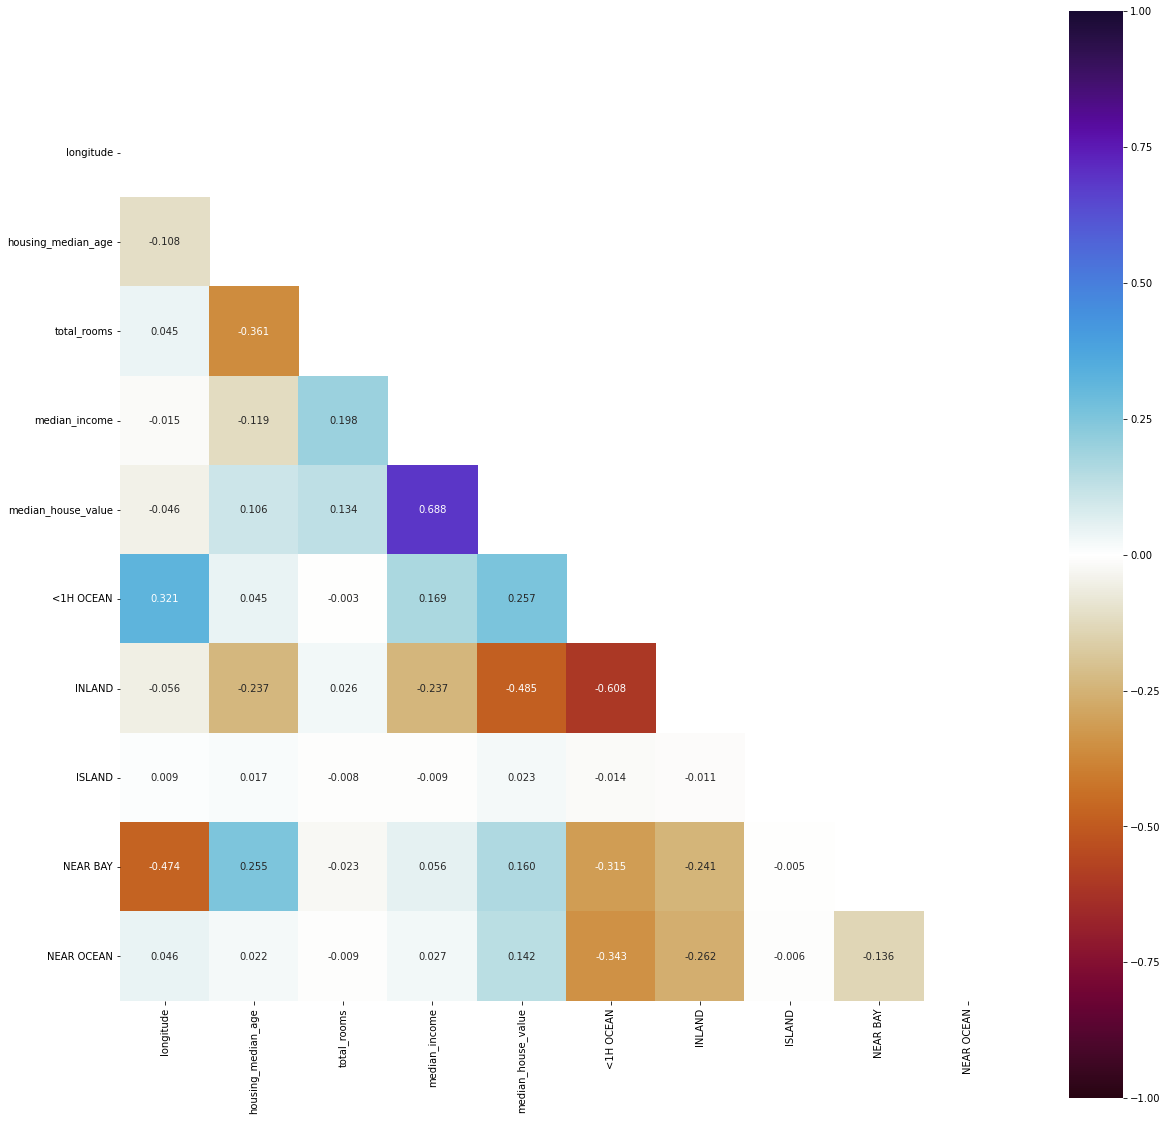

In [24]:
matrix=new_df.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(matrix, mask=mask,vmin=-1, vmax=1 , annot=True,
fmt='.3f', square=True, cmap = cmap)
plt.show();

<AxesSubplot:title={'center':'Height vs Potential'}, xlabel='median_income', ylabel='median_house_value'>

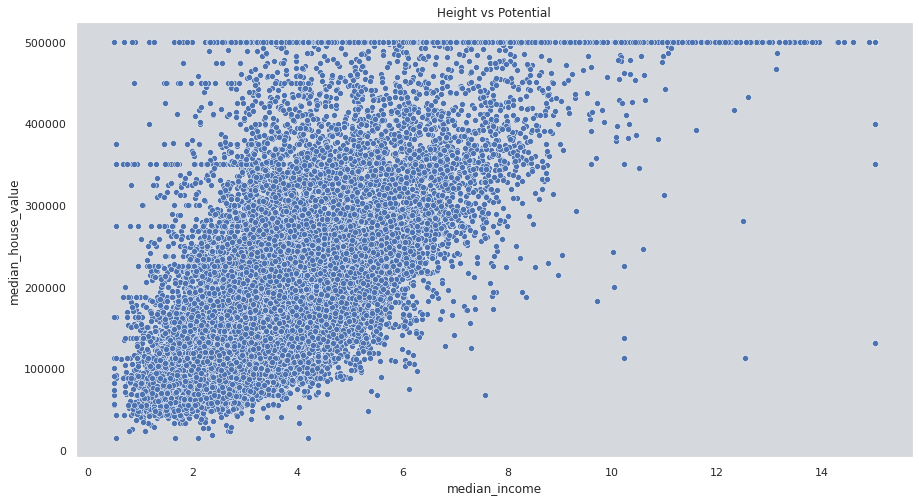

In [25]:
sns.set(rc={'figure.figsize':(15,8)})
ax = plt.axes()
ax.set_facecolor("#D5D8DC")
ax.grid(False)
plt.title('Height vs Potential')
#plt.xticks(np.linspace(1e6,6 , num=21))
sns.scatterplot(new_df['median_income'],new_df['median_house_value'],  palette="rocket" )

In [26]:
new_df

,longitude,housing_median_age,total_rooms,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,41.0,880.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,21.0,7099.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,52.0,1467.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,52.0,1274.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,52.0,1627.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,25.0,1665.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,18.0,697.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,17.0,2254.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,18.0,1860.0,1.8672,84700.0,0,1,0,0,0


In [27]:
new_df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [28]:
scaler = StandardScaler()

In [29]:
X=scaler.fit_transform(new_df.drop('median_house_value',axis=1))

In [30]:
y=new_df['median_house_value']

In [31]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))
lr.score(X_test,y_test)

5402396657.375222
0.3414743078015099


0.6014877848808641

In [63]:
lr = RandomForestRegressor(criterion='mse', n_jobs=-1, verbose=1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))
lr.score(X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


3578756870.5734916
0.6456068014335947


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7360100676950323

In [71]:
lr = XGBRegressor()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))
print(round(lr.score(X_test,y_test),2))

3536296157.6962066
0.6553298975107471
0.74


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print("Cross-validation accuracy (cv only on ridge): {:.2f}".format(
      np.mean(cross_val_score(Ridge(), X, y, cv=3))))

Cross-validation accuracy (cv only on ridge): 0.53


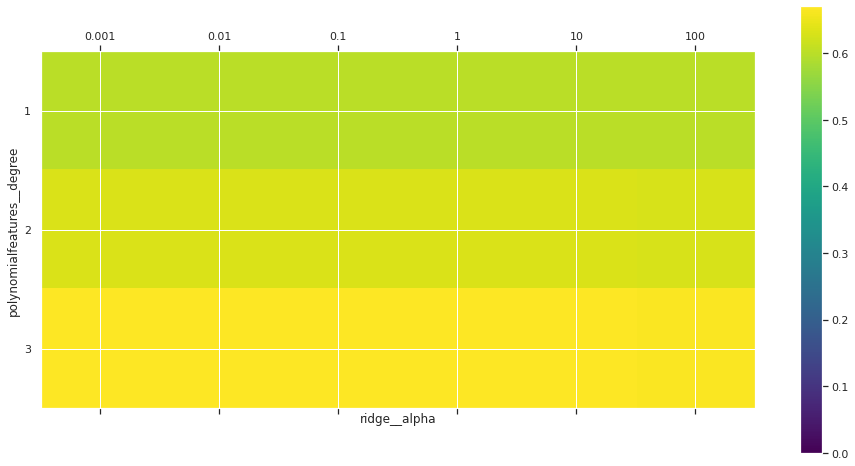

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
            vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
           param_grid['polynomialfeatures__degree'])

plt.colorbar()


In [79]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 0.01}


In [80]:
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.67
